In [113]:

import math
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


plt.style.use('seaborn')
sns.set(font_scale=1)


import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [115]:
bnb = pd.read_csv('AB_NYC_2019.csv')

In [116]:
bnb.head(3)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365


In [117]:
bnb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [118]:
print("total number of data ", bnb.shape[0]*bnb.shape[1])
print("total number of null: {} = total of {:.2f}% ".format(bnb.isnull().sum().sum(), (bnb.isnull().sum().sum()*100)/(bnb.shape[0]*bnb.shape[1])))
print("total number of host ID: {} , number of host {}".format(bnb['host_id'].nunique(), bnb['host_name'].nunique()))
print("2019년 뉴욕의 평균 Airbnb 금액: {:.2f} $".format(bnb['price'].mean()))

총 데이터 개수:  782320
총 결측치 수: 20141 = 전체 데이터의 2.57% 
호스트 ID: 37457 개, 호스트 11452 명
2019년 뉴욕의 평균 Airbnb 금액: 152.72 $


Questions

* The host with the most listings on Airbnb is likely to vary depending on location and time?
* The most expensive and cheapest rooms on Airbnb will also vary by location?
* The most expensive area in New York City for Airbnb rentals may also vary depending on location and time?
* Airbnb rentals may vary by type and location.
* Is it possible to predict Airbnb prices using data analysis and machine learning methods, but the accuracy may vary depending on the factors influencing the prices?

In [119]:
# NUMBER OF NULL
bnb.isnull().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [120]:
# Visualize the missing value
import missingno

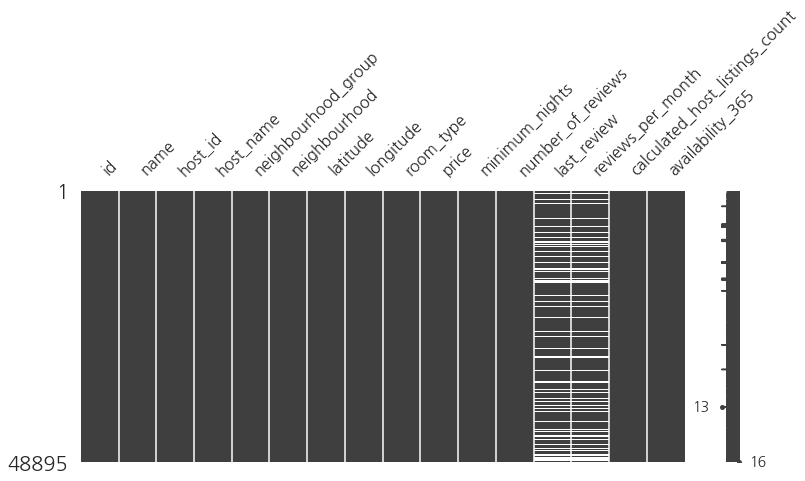

In [121]:
missingno.matrix(bnb, figsize=(12,5))

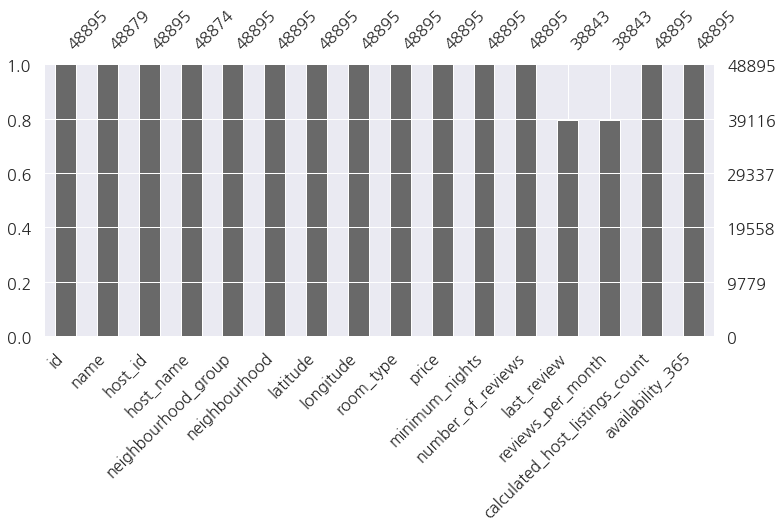

In [ ]:
missingno.bar(bnb, figsize=(12,5))

In [122]:
bnb.fillna({'reviews_per_month': 0}, inplace= True)
bnb.fillna({'name': "NoName"}, inplace= True)

In [123]:
bnb.drop(['host_id', 'last_review'], axis =1, inplace = True)

In [124]:
bnb[bnb['host_name']== bnb['name']]

,id,name,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
9473,7264659,Olivier,Olivier,Manhattan,Upper West Side,40.78931,-73.97520,Entire home/apt,200,5,12,0.25,1,25
10682,8212051,Monty,Monty,Brooklyn,East Flatbush,40.66383,-73.92706,Shared room,95,2,7,0.15,1,238
16422,13186374,Sean,Sean,Brooklyn,Windsor Terrace,40.65182,-73.98043,Entire home/apt,400,7,0,0.00,1,0
23996,19348168,Cyn,Cyn,Brooklyn,Bedford-Stuyvesant,40.67850,-73.91478,Private room,75,2,1,0.10,1,0
24152,19456810,Hillside Hotel,Hillside Hotel,Queens,Briarwood,40.70454,-73.81549,Private room,93,1,2,0.08,18,90
24607,19785737,Hillside Hotel,Hillside Hotel,Queens,Jamaica,40.70445,-73.81399,Private room,135,1,1,0.05,18,180
26734,21231543,Hillside Hotel,Hillside Hotel,Queens,Jamaica,40.70428,-73.81353,Private room,135,1,0,0.00,18,365
26752,21243952,Hillside Hotel,Hillside Hotel,Queens,Jamaica,40.70288,-73.81531,Private room,135,1,1,0.05,18,365
26753,21244035,Hillside Hotel,Hillside Hotel,Queens,Jamaica,40.70319,-73.81410,Private room,135,1,2,0.09,18,365
26889,21311903,Hillside Hotel,Hillside Hotel,Queens,Jamaica,40.70258,-73.81510,Private room,135,1,0,0.00,18,365


In [125]:
bnb.duplicated().sum()

0

In [126]:
bnb.describe()

,id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000
mean,1.901714e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.090910,7.143982,112.781327
std,1.098311e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.597283,32.952519,131.622289
min,2.539000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000
25%,9.471945e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.040000,1.000000,0.000000
50%,1.967728e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.370000,1.000000,45.000000
75%,2.915218e+07,40.763115,-73.936275,175.000000,5.000000,24.000000,1.580000,2.000000,227.000000
max,3.648724e+07,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


In [127]:
len(bnb[bnb['price']== 0])

11

In [128]:
bnb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 14 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48895 non-null  object 
 2   host_name                       48874 non-null  object 
 3   neighbourhood_group             48895 non-null  object 
 4   neighbourhood                   48895 non-null  object 
 5   latitude                        48895 non-null  float64
 6   longitude                       48895 non-null  float64
 7   room_type                       48895 non-null  object 
 8   price                           48895 non-null  int64  
 9   minimum_nights                  48895 non-null  int64  
 10  number_of_reviews               48895 non-null  int64  
 11  reviews_per_month               48895 non-null  float64
 12  calculated_host_listings_count  

## **Anaylsis**

(-500.0, 6000.0)

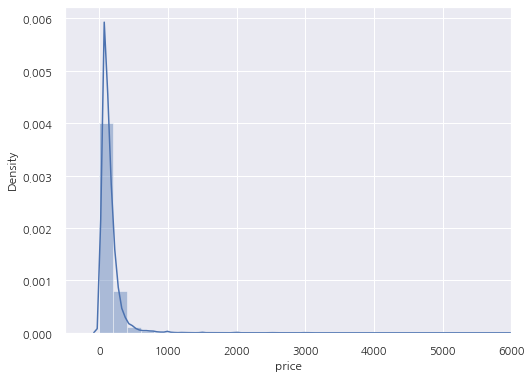

In [129]:
# 뉴욕 Airbnb의 금액 분포 나타내기

f, ax = plt.subplots(1,1, figsize=(8,6))
sns.distplot(bnb['price'], hist=True, ax=ax)

ax.set_xlim(-500, 6000)

In [130]:

print("Skewness: %.2f" % bnb['price'].skew())
print("Kurtosis: %.2f" % bnb['price'].kurt())
# both skewness and kurtosis values are very high, 
# it suggests that the data distribution is heavily skewed and has a large number of outliers.

Skewness: 19.12
Kurtosis: 585.67


In [131]:
# minumum night and price
pd.concat([bnb['price'], bnb['minimum_nights']], axis = 1)

,price,minimum_nights
0,149,1
1,225,1
2,150,3
3,89,1
4,80,10
...,...,...
48890,70,2
48891,40,4
48892,115,10
48893,55,1


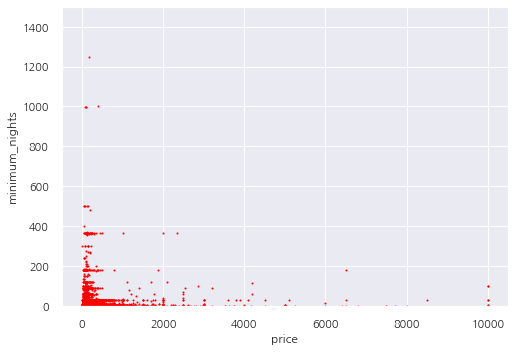

In [132]:
bnb.plot.scatter(x='price',y='minimum_nights',ylim=(0,1500), s=1, color='red')

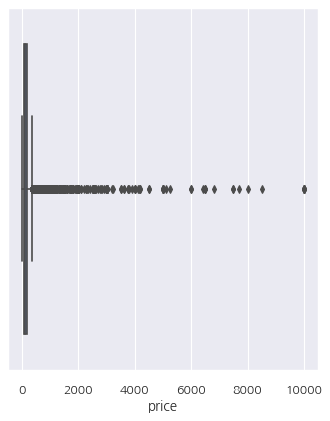

In [133]:
f, ax = plt.subplots(1,1,figsize=(5,6), dpi=80)

sns.boxplot(bnb['price'], showfliers= True, ax=ax)

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


Text(0.5, 1.0, 'Correlation map for Airbnb Data')

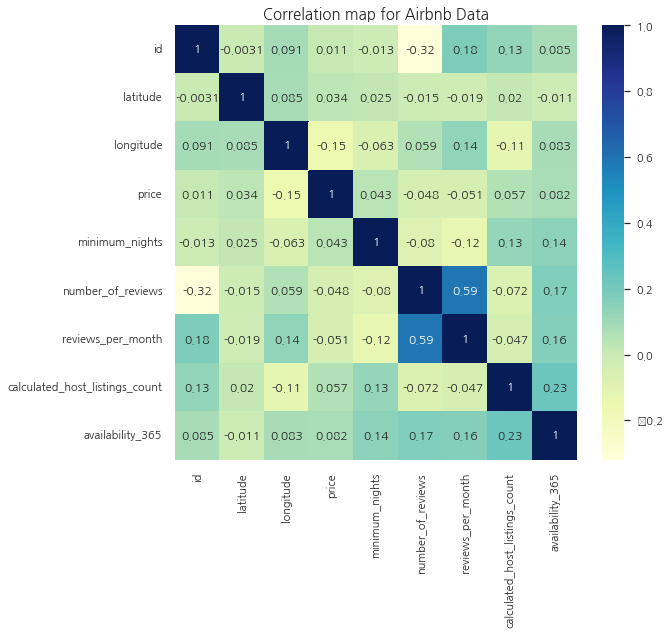

In [134]:
f, ax = plt.subplots(1,1,figsize=(9,8))

corrmat = bnb.corr()
sns.heatmap(corrmat, annot =True, cmap='YlGnBu', ax=ax)
plt.title('Correlation map for Airbnb Data', size=15)

Cleaning OutLiers


In [135]:
min_threshold,max_threshold= bnb['price'].quantile([0.01, 0.99]) 
min_threshold,max_threshold
#min_th

(30.0, 799.0)

In [136]:
bnb[bnb['price'] < min_threshold]
# min 404개
bnb[bnb['price'] > max_threshold]
# max 474개

,id,name,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
85,19601,perfect for a family or small group,Maggie,Brooklyn,Brooklyn Heights,40.69723,-73.99268,Entire home/apt,800,1,25,0.24,1,7
496,174966,Luxury 2Bed/2.5Bath Central Park View,Henry,Manhattan,Upper West Side,40.77350,-73.98697,Entire home/apt,2000,30,30,0.33,11,0
662,250801,Heart & Soul of Greenwich Village,Rhona,Manhattan,Greenwich Village,40.73129,-73.99944,Entire home/apt,850,3,107,1.15,1,249
762,273190,6 Bedroom Landmark West Village Townhouse,West Village,Manhattan,West Village,40.73301,-74.00268,Entire home/apt,1300,5,28,0.31,4,297
780,279857,#1 Yellow Block BnB/see at Net Flix Show Stay ...,Gordy,Brooklyn,Bedford-Stuyvesant,40.68492,-73.95489,Entire home/apt,800,4,122,1.37,1,257
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48304,36189195,Next to Times Square/Javits/MSG! Amazing 1BR!,Rogelio,Manhattan,Hell's Kitchen,40.75533,-73.99866,Entire home/apt,2999,30,0,0.00,1,222
48305,36189257,2BR Near Museum Mile! Upper East Side!,Mary Rotsen,Manhattan,Upper East Side,40.78132,-73.95262,Entire home/apt,1999,30,0,0.00,1,270
48523,36308562,"Tasteful & Trendy Brooklyn Brownstone, near Train",Sandy,Brooklyn,Bedford-Stuyvesant,40.68767,-73.95805,Entire home/apt,1369,1,0,0.00,1,349
48535,36311055,"Stunning & Stylish Brooklyn Luxury, near Train",Urvashi,Brooklyn,Bedford-Stuyvesant,40.68245,-73.93417,Entire home/apt,1749,1,0,0.00,1,303


In [137]:
bnb_thr = bnb[(bnb['price'] > min_threshold) & (bnb['price'] < max_threshold)]
bnb_thr.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 47744 entries, 0 to 48894
Data columns (total 14 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              47744 non-null  int64  
 1   name                            47744 non-null  object 
 2   host_name                       47724 non-null  object 
 3   neighbourhood_group             47744 non-null  object 
 4   neighbourhood                   47744 non-null  object 
 5   latitude                        47744 non-null  float64
 6   longitude                       47744 non-null  float64
 7   room_type                       47744 non-null  object 
 8   price                           47744 non-null  int64  
 9   minimum_nights                  47744 non-null  int64  
 10  number_of_reviews               47744 non-null  int64  
 11  reviews_per_month               47744 non-null  float64
 12  calculated_host_listings_count  

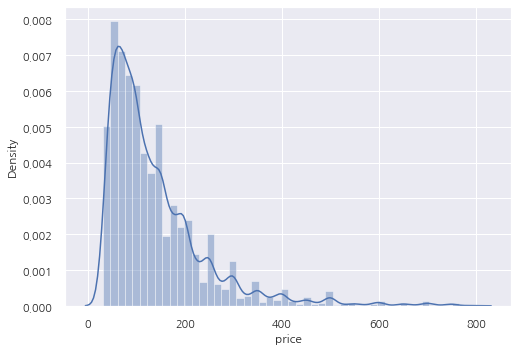

In [138]:
sns.distplot(bnb_thr['price'])

In [139]:
#skewness and kurtosis
print("Skewness: %.2f" % bnb_thr['price'].skew())
print("Kurtosis: %.2f" % bnb_thr['price'].kurt())

Skewness: 2.24
Kurtosis: 7.04


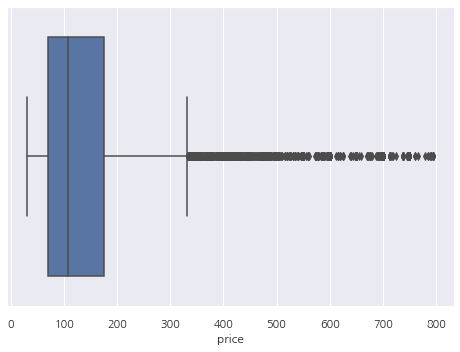

In [140]:
sns.boxplot(bnb_thr['price'])

In [141]:
bnb_thr.head(3)

,id,name,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,0.21,6,365
1,2595,Skylit Midtown Castle,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,0.00,1,365


In [142]:
top_host = bnb_thr.host_name.value_counts().head(10)
top_host

Michael         410
David           395
Sonder (NYC)    327
John            288
Alex            272
Blueground      232
Sarah           225
Daniel          223
Jessica         200
Maria           198
Name: host_name, dtype: int64

In [143]:
top_host2 = pd.DataFrame(top_host)
top_host2.reset_index(inplace=True)
top_host2.rename(columns={'index': 'host_name', 'host_name': 'count'}, inplace= True)
top_host2

,host_name,count
0,Michael,410
1,David,395
2,Sonder (NYC),327
3,John,288
4,Alex,272
5,Blueground,232
6,Sarah,225
7,Daniel,223
8,Jessica,200
9,Maria,198


[Text(0, 0, 'Michael'),
 Text(0, 0, 'David'),
 Text(0, 0, 'Sonder (NYC)'),
 Text(0, 0, 'John'),
 Text(0, 0, 'Alex'),
 Text(0, 0, 'Blueground'),
 Text(0, 0, 'Sarah'),
 Text(0, 0, 'Daniel'),
 Text(0, 0, 'Jessica'),
 Text(0, 0, 'Maria')]

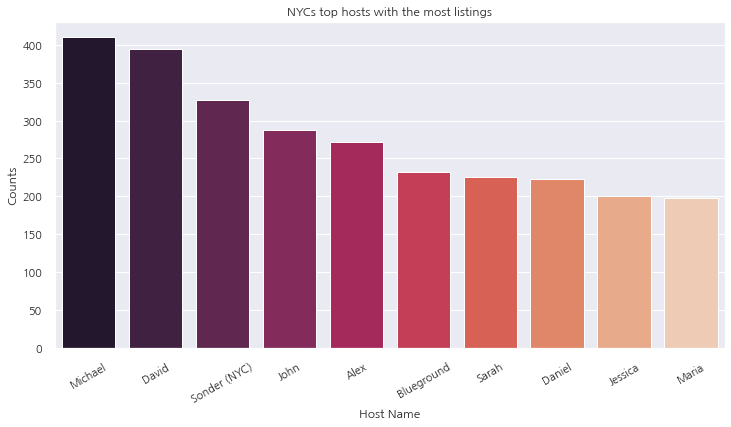

In [144]:
#bar 
f, ax = plt.subplots(1, 1, figsize = (12,6))

sns.barplot(x='host_name', y= 'count', data=top_host2, palette='rocket', ax=ax)
ax.set_title('NYCs top hosts with the most listings')
ax.set_xlabel('Host Name')
ax.set_ylabel('Counts')

ax.set_xticklabels(ax.get_xticklabels(), rotation=30)

In [145]:
# the most expensive neighbourhood
bnb_thr.groupby('neighbourhood_group')['price'].idxmax()

neighbourhood_group
Bronx             8521
Brooklyn          4428
Manhattan         7017
Queens           14747
Staten Island     3049
Name: price, dtype: int64

In [146]:

bnb_thr.loc[bnb_thr.groupby('neighbourhood_group')['price'].idxmax()][['name','neighbourhood_group','host_name','price']]

,name,neighbourhood_group,host_name,price
8521,1 Room in a 2 Bedroom Available,Bronx,Jonathan,680
4428,Unique Brooklyn Brownstone,Brooklyn,Rachel,795
7017,Historic Upper West Side Townhouse,Manhattan,David,795
14747,3 bedroom near Park,Queens,Jackie,750
3049,Spacious center hall colonial,Staten Island,Donna,700


In [147]:

bnb_thr.groupby('neighbourhood_group')['price'].idxmin()

neighbourhood_group
Bronx             3889
Brooklyn          2887
Manhattan         7431
Queens            6615
Staten Island    30312
Name: price, dtype: int64

In [148]:
# the cheapest neighbourhood
bnb_thr.loc[bnb_thr.groupby('neighbourhood_group')['price'].idxmin()][['name','neighbourhood_group','host_name','price']]

,name,neighbourhood_group,host_name,price
3889,"A Simple, Calm Space",Bronx,Août,32
2887,Amazing Spacious Room,Brooklyn,Lord Daniel,31
7431,Cozy room right on BROADWAY - Washington Heights,Manhattan,Nga,31
6615,"Super Clean, Quiet & Spacious Room",Queens,Troy,31
30312,Nice room near SI Ferry \n15 minutes by car.,Staten Island,Sara I,31


In [149]:

bnb_thr['neighbourhood_group'].unique()

array(['Brooklyn', 'Manhattan', 'Queens', 'Staten Island', 'Bronx'],
      dtype=object)

Text(0.5, 1.0, 'Prices with different regions')

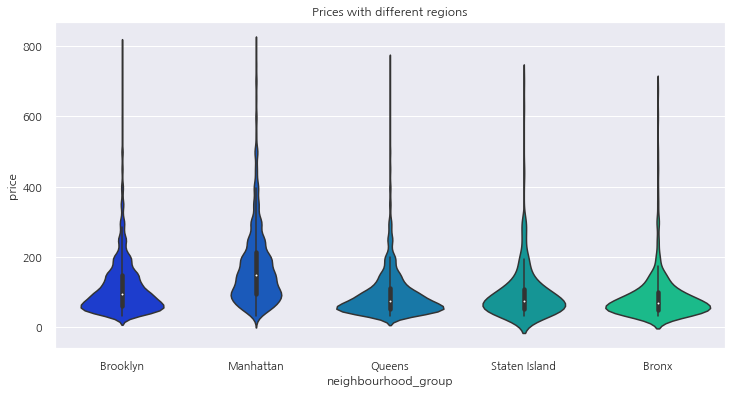

In [150]:
#Violin plo
f, ax = plt.subplots(1, 1, figsize = (12,6))

sns.violinplot(x='neighbourhood_group',y='price', data=bnb_thr ,palette='winter', ax=ax)
ax.set_title('Prices with different regions')

#맨하탄이 대체적으로 가격이 높다!
#대부분 100$ 이하에서 가격대가 형성되어 있다

In [151]:
bnb_thr['room_type'].unique()

array(['Private room', 'Entire home/apt', 'Shared room'], dtype=object)

In [167]:
room_type2 = bnb_thr.groupby(['neighbourhood_group'])['room_type'].value_counts().unstack(0)

room_type2

neighbourhood_group,Bronx,Brooklyn,Manhattan,Queens,Staten Island
room_type,,,,,
Entire home/apt,377,9470,12887,2080,172
Private room,610,9909,7875,3285,177
Shared room,34,279,458,127,4


[Text(0, 0, 'Entire home/apt'),
 Text(0, 0, 'Private room'),
 Text(0, 0, 'Shared room')]

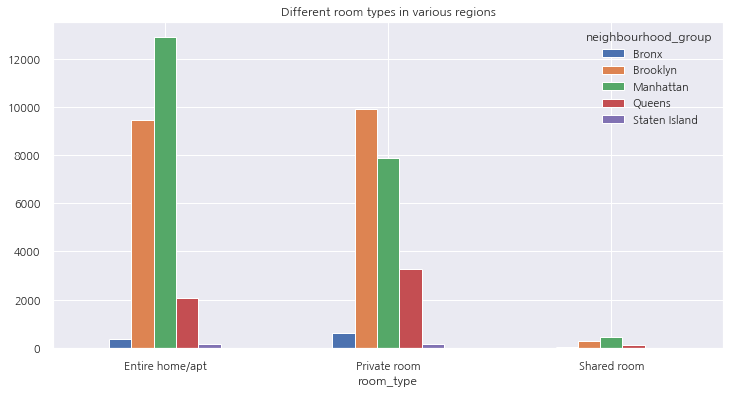

In [161]:
g = room_type2.plot(kind='bar', figsize=(12,6))
g.set_title('Different room types in various regions')
g.set_xticklabels(g.get_xticklabels(), rotation=0)

#Manhattan is generally considered to be an expensive area for Airbnb rentals. 
#The majority of the prices for rentals in Manhattan tend to fall within the range of $100 or less.

In [154]:
# rooms with the most review in New York
top10_review= bnb.nlargest(10,'reviews_per_month')
top10_review[['name','reviews_per_month','neighbourhood_group']]

,name,reviews_per_month,neighbourhood_group
42075,Enjoy great views of the City in our Deluxe Room!,58.50,Manhattan
42076,Great Room in the heart of Times Square!,27.95,Manhattan
38870,Lou's Palace-So much for so little,20.94,Queens
27287,JFK Comfort.5 Mins from JFK Private Bedroom & ...,19.75,Queens
28651,JFK 2 Comfort 5 Mins from JFK Private Bedroom,17.82,Queens
29628,JFK 3 Comfort 5 Mins from JFK Private Bedroom,16.81,Queens
20403,Cozy Room Family Home LGA Airport NO CLEANING FEE,16.22,Queens
22469,Cute Tiny Room Family Home by LGA NO CLEANING FEE,16.03,Queens
36238,“For Heaven Cakes”,15.78,Queens
40297,Studio Apartment 6 minutes from JFK Airport,15.32,Queens


Text(0.5, 1.0, 'Most Reviewed room_types in each Neighbourhood Groups')

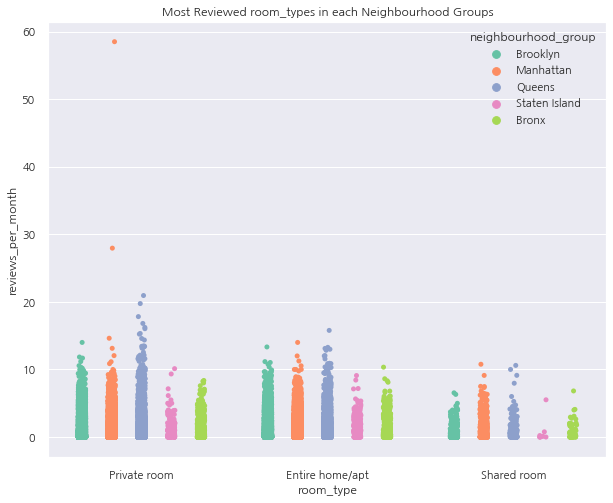

In [155]:
f, ax = plt.subplots(1, 1, figsize=(10,8))


sns.stripplot(x='room_type',y='reviews_per_month', data = bnb, hue='neighbourhood_group'
  , dodge=True, jitter = True, palette='Set2', ax=ax) 



ax.set_title('Most Reviewed room_types in each Neighbourhood Groups')

#According to the data, private rooms in Queens received the most reviews among other room types. 
#The number of reviews for private rooms in Manhattan and Brooklyn were similar.

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


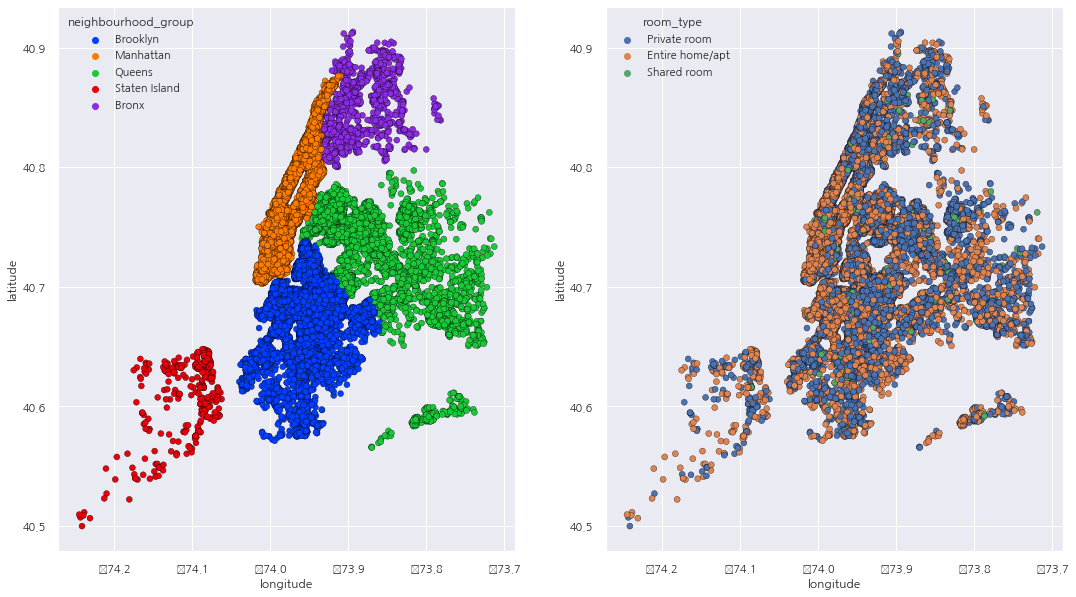

In [156]:
f, ax = plt.subplots(1, 2, figsize = (18, 10))

sns.scatterplot(x= 'longitude', y='latitude', data=bnb_thr, hue= 'neighbourhood_group',palette='bright', edgecolor='black',linewidth=0.3, ax=ax[0])
sns.scatterplot(x= 'longitude', y='latitude', data=bnb_thr, hue= 'room_type',edgecolor='black',linewidth=0.3, ax=ax[1])

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


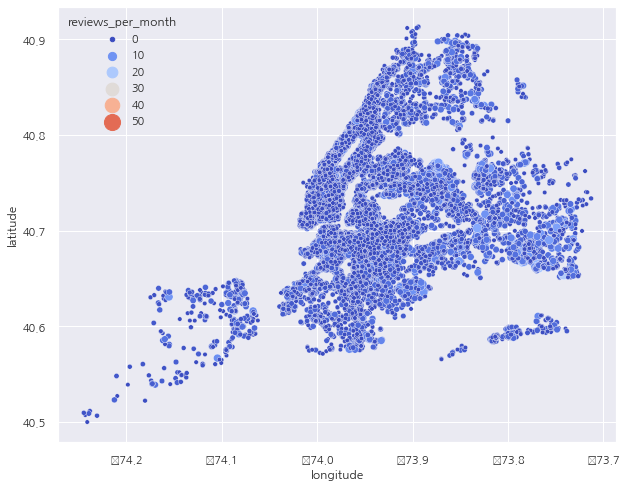

In [ ]:
# The data can be represented by the size of the circles, 
#where the size of the circles represents the number of possible rental days 
# in a year or the number of reviews per month.
f, ax = plt.subplots(1, 1, figsize=(10, 8))

sns.scatterplot(data=bnb_thr, x='longitude', y='latitude', hue="reviews_per_month", 
                palette='coolwarm', size='reviews_per_month', sizes=(20,300))

In [ ]:


from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import LabelEncoder

In [ ]:
bnb_md = bnb_thr

In [ ]:

labelencoder = LabelEncoder()
bnb_md['neighbourhood_group'] = labelencoder.fit_transform(bnb_md['neighbourhood_group'])
bnb_md['neighbourhood'] = labelencoder.fit_transform(bnb_md['neighbourhood'])
bnb_md['room_type'] = labelencoder.fit_transform(bnb_md['room_type'])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row

In [ ]:
feature_columns  = ['neighbourhood_group', 'neighbourhood', 'room_type', 'minimum_nights',
                 'calculated_host_listings_count', 'availability_365']

In [ ]:

x = bnb_md[feature_columns]

y = bnb_md['price']


train_x, test_x, train_y, test_y = train_test_split(x, y, train_size=0.7,test_size=0.3,random_state=42)
print(train_x.shape, test_x.shape, train_y.shape, test_y.shape)

(33420, 6) (14324, 6) (33420,) (14324,)


In [ ]:

linreg = LinearRegression()
linreg.fit(train_x, train_y)

LinearRegression()

In [ ]:

test_predict = linreg.predict(test_x) 
print('Accuracy on test set: {}'.format(linreg.score(test_x, test_y)))

Accuracy on test set: 0.27716679698367785


In [ ]:
# price prediction
test_predict = linreg.predict(test_x) 
error = pd.DataFrame(np.array(test_y).flatten(),columns=['Actual'])
error['Prediction'] = np.array(test_predict)
error['Delta'] = abs(error['Actual'] - error['Prediction']) #차이의 절대값
error.head(10)

,Actual,Prediction,Delta
0,199,174.746626,24.253374
1,120,115.541544,4.458456
2,225,165.928935,59.071065
3,50,85.630165,35.630165
4,120,177.880436,57.880436
5,138,92.635509,45.364491
6,100,172.596882,72.596882
7,118,197.498136,79.498136
8,95,90.470478,4.529522
9,32,58.981328,26.981328
